In [2]:
# Import basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import label encoder, chi2, model selection
from scipy.stats import chi2_contingency
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Import Model and scores
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.svm import SVC


In [65]:
data_train = pd.read_csv(r'C:\swathi\project-Datascience\bank-additional-full (1).csv', na_values =['NA'])
columns = data_train.columns.values[0].split(';')
columns = [column.replace('"', '') for column in columns]
data_train = data_train.values
data_train = [items[0].split(';') for items in data_train]
data_train = pd.DataFrame(data_train,columns = columns)

data_train['job'] = data_train['job'].str.replace('"', '')
data_train['marital'] = data_train['marital'].str.replace('"', '')
data_train['education'] = data_train['education'].str.replace('"', '')
data_train['default'] = data_train['default'].str.replace('"', '')
data_train['housing'] = data_train['housing'].str.replace('"', '')
data_train['loan'] = data_train['loan'].str.replace('"', '')
data_train['contact'] = data_train['contact'].str.replace('"', '')
data_train['month'] = data_train['month'].str.replace('"', '')
data_train['day_of_week'] = data_train['day_of_week'].str.replace('"', '')
data_train['poutcome'] = data_train['poutcome'].str.replace('"', '')
data_train['y'] = data_train['y'].str.replace('"', '')

In [66]:
data_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [67]:
data_train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [68]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             41188 non-null  object
 1   job             41188 non-null  object
 2   marital         41188 non-null  object
 3   education       41188 non-null  object
 4   default         41188 non-null  object
 5   housing         41188 non-null  object
 6   loan            41188 non-null  object
 7   contact         41188 non-null  object
 8   month           41188 non-null  object
 9   day_of_week     41188 non-null  object
 10  duration        41188 non-null  object
 11  campaign        41188 non-null  object
 12  pdays           41188 non-null  object
 13  previous        41188 non-null  object
 14  poutcome        41188 non-null  object
 15  emp.var.rate    41188 non-null  object
 16  cons.price.idx  41188 non-null  object
 17  cons.conf.idx   41188 non-null  object
 18  euribo

In [69]:
print(data_train.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [70]:
print(data_train['job'].unique())
print(data_train['marital'].unique())
print(data_train['education'].unique())
print(data_train['default'].unique())
print(data_train['housing'].unique())
print(data_train['loan'].unique())
print(data_train['contact'].unique())
print(data_train['month'].unique())
print(data_train['day_of_week'].unique())
print(data_train['duration'].unique())
print(data_train['campaign'].unique())
print(data_train['pdays'].unique())
print(data_train['previous'].unique())
print(data_train['poutcome'].unique())
print(data_train['emp.var.rate'].unique())
print(data_train['cons.price.idx'].unique())
print(data_train['cons.conf.idx'].unique())
print(data_train['euribor3m'].unique())
print(data_train['nr.employed'].unique())
print(data_train['y'].unique())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
['261' '149' '226' ... '1246' '1556' '1868']
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '19' '18' '23'
 '14' '22' '25' '16' '17' '15' '20' '56' '39' '35' '42' '28' '26' '27'
 '32' '21' '24' '29' '31' '30' '41' '37' '40' '33' '34' '43']
['999' '6' '4' '3' '5' '1' '0' '10' '7' '8' '9' '11' '2' '12' '13' '14'
 '15' '16' '21' '17' '18' '22' '25' '26' '19' '27' '20']
['0' '1' '2' '3' '4' '5' '6' '7']
['nonexistent' 'failure' 'success']
['1.1' '1.4' '-0.1' '-0.2' '-1.8' '-2.9' '-3.4' '-3' '-1

In [71]:
df_2 = data_train.copy()
df_2['job'] = df_2['job'].map({'admin.':1, 'blue-collar':2, 'entrepreneur':3, 'housemaid':4, 'management':5, 'retired':6, 'self-employed':7, 'services':8, 'student':9, 'technician':10, 'unemployed':11, 'unknown':12})
df_2['marital'] = df_2['marital'].map({'divorced':1, 'married':2, 'single':3, 'unknown':4})
df_2['education'] = df_2['education'].map({'basic.4y':1, 'basic.6y':2, 'basic.9y':3, 'high.school':4, 'illiterate':5, 'professional.course':6, 'university.degree':7, 'unknown':8})
df_2['default'] = df_2['default'].map({'no':1, 'unknown':2, 'yes':3})
df_2['housing'] = df_2['housing'].map({'no':1, 'unknown':2, 'yes':3})
df_2['loan'] = df_2['loan'].map({'no':1, 'unknown':2, 'yes':3})
df_2['contact'] = df_2['contact'].map({'cellular':1, 'telephone':2})
df_2['month'] = df_2['month'].map({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12,
                                   'mar':3, 'apr':4,'sep':9})
df_2['day_of_week'] = df_2['day_of_week'].map({'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5})
df_2['poutcome'] = df_2['poutcome'].map({'failure':1, 'nonexistent':2, 'success':3})
df_2['y'] = df_2['y'].map({'no':0,'yes':1})
df_2['age']=pd.to_numeric(df_2.age)

In [72]:
df_2.shape

(41188, 21)

In [73]:
df_2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,4,2,1,1,1,1,2,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,0
1,57,8,2,4,2,1,1,2,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,0
2,37,8,2,4,1,3,1,2,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,0
3,40,1,2,2,1,1,1,2,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,0
4,56,8,2,4,1,1,3,2,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,2,6,1,3,1,1,11,5,...,1,999,0,2,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,2,2,6,1,1,1,1,11,5,...,1,999,0,2,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,6,2,7,1,3,1,1,11,5,...,2,999,0,2,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,10,2,6,1,1,1,1,11,5,...,1,999,0,2,-1.1,94.767,-50.8,1.028,4963.6,1


In [74]:
new_df = df_2.sample(300)
new_df.shape

(300, 21)

In [75]:
df_2.groupby('y').size()

y
0    36548
1     4640
dtype: int64

In [76]:
df_2 .describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,4.72458,2.172769,4.747184,1.208872,2.071720,1.327425,1.365252,6.607896,2.979581,1.930101,0.112654
std,10.42125,3.59456,0.608902,2.136482,0.406686,0.985314,0.723616,0.481507,2.040998,1.411514,0.362886,0.316173
min,17.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,0.000000
25%,32.00000,1.00000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,2.000000,0.000000
50%,38.00000,3.00000,2.000000,4.000000,1.000000,3.000000,1.000000,1.000000,6.000000,3.000000,2.000000,0.000000
75%,47.00000,8.00000,3.000000,7.000000,1.000000,3.000000,1.000000,2.000000,8.000000,4.000000,2.000000,0.000000
max,98.00000,12.00000,4.000000,8.000000,3.000000,3.000000,3.000000,2.000000,12.000000,5.000000,3.000000,1.000000


In [77]:
df_2["age"].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

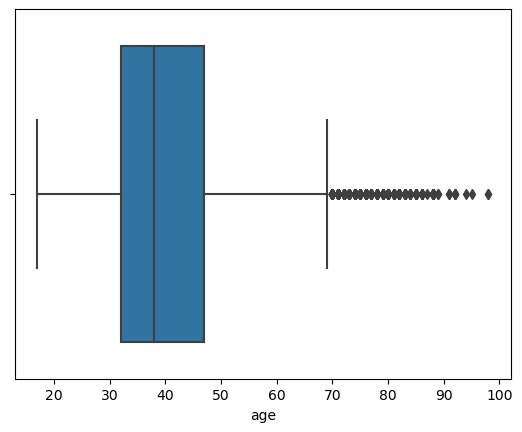

In [78]:
sns.boxplot(data=df_2, x='age', hue='y')

From above diagram we can observe that most of the dataset values(age) lies in the range of early 20's to 70 and 25th percentile around 32 and 75th percentile around 48. Median lies at 38 aproximately.From above age 70 we observe some outliers.

In [79]:
df_2[df_2['age']>70].count()

age               422
job               422
marital           422
education         422
default           422
housing           422
loan              422
contact           422
month             422
day_of_week       422
duration          422
campaign          422
pdays             422
previous          422
poutcome          422
emp.var.rate      422
cons.price.idx    422
cons.conf.idx     422
euribor3m         422
nr.employed       422
y                 422
dtype: int64

In [80]:
df_2[df_2['age']>70]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27757,76,6,2,7,1,1,3,1,3,4,...,9,999,0,2,-1.8,92.843,-50,1.757,5099.1,0
27780,73,6,2,7,1,3,1,1,3,2,...,1,999,1,1,-1.8,92.843,-50,1.687,5099.1,0
27800,88,6,1,1,1,3,1,1,3,3,...,1,999,0,2,-1.8,92.843,-50,1.663,5099.1,0
27802,88,6,1,1,1,1,1,1,3,3,...,2,999,0,2,-1.8,92.843,-50,1.663,5099.1,1
27805,88,6,1,1,1,3,3,1,3,3,...,5,999,0,2,-1.8,92.843,-50,1.663,5099.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84,6,1,1,2,3,3,1,10,1,...,4,3,1,3,-1.1,94.601,-49.5,1,4963.6,0
40996,81,6,2,1,1,3,1,1,10,3,...,1,999,2,1,-1.1,94.601,-49.5,1.016,4963.6,1
41004,80,6,2,6,1,3,1,1,10,4,...,1,999,1,1,-1.1,94.601,-49.5,1.025,4963.6,1
41183,73,6,2,6,1,3,1,1,11,5,...,1,999,0,2,-1.1,94.767,-50.8,1.028,4963.6,1


In [81]:
df_2[(df_2['age']<70) & (df_2['y'] == 1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,2,1,1,2,3,1,2,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,1
83,49,3,2,7,2,3,1,2,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,1
88,49,10,2,3,1,1,1,2,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,1
129,41,10,2,6,2,3,1,2,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,1
139,45,2,2,3,2,3,1,2,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41173,62,6,2,7,1,3,1,1,11,4,...,1,999,2,1,-1.1,94.767,-50.8,1.031,4963.6,1
41174,62,6,2,7,1,3,1,1,11,4,...,1,1,6,3,-1.1,94.767,-50.8,1.031,4963.6,1
41178,62,6,2,7,1,1,1,1,11,4,...,2,6,3,3,-1.1,94.767,-50.8,1.031,4963.6,1
41181,37,1,2,7,1,3,1,1,11,5,...,1,999,0,2,-1.1,94.767,-50.8,1.028,4963.6,1


In [82]:
df_2[(df_2['age']>70) & (df_2['y'] == 1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27802,88,6,1,1,1,1,1,1,3,3,...,2,999,0,2,-1.8,92.843,-50,1.663,5099.1,1
27805,88,6,1,1,1,3,3,1,3,3,...,5,999,0,2,-1.8,92.843,-50,1.663,5099.1,1
27810,88,6,1,1,1,3,1,1,3,3,...,1,999,0,2,-1.8,92.843,-50,1.663,5099.1,1
27811,88,6,1,1,1,1,1,1,3,3,...,1,999,0,2,-1.8,92.843,-50,1.663,5099.1,1
27813,88,6,1,1,1,3,1,1,3,3,...,7,999,0,2,-1.8,92.843,-50,1.663,5099.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40756,77,6,2,1,1,3,1,1,9,4,...,1,999,0,2,-1.1,94.199,-37.5,0.879,4963.6,1
40933,71,6,2,6,1,1,1,1,10,2,...,1,999,0,2,-1.1,94.601,-49.5,0.982,4963.6,1
40996,81,6,2,1,1,3,1,1,10,3,...,1,999,2,1,-1.1,94.601,-49.5,1.016,4963.6,1
41004,80,6,2,6,1,3,1,1,10,4,...,1,999,1,1,-1.1,94.601,-49.5,1.025,4963.6,1


By comparing above two calculations we can see considerable percentage of people taken term deposit above age 70.

<AxesSubplot:xlabel='age', ylabel='Density'>

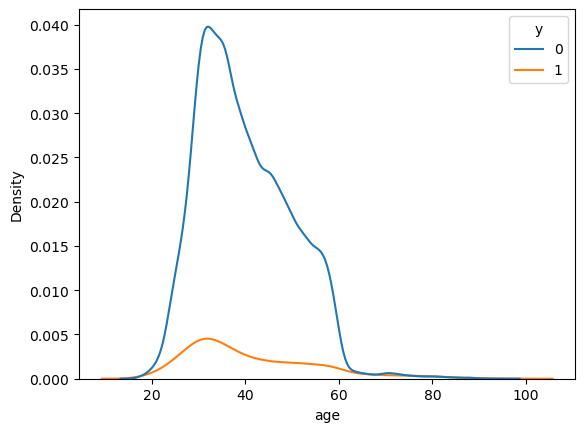

In [83]:
sns.kdeplot(data=df_2, x="age", hue="y")

According to the total number of people contacted through marketing campaign, people taken term deposit is much lower in percentage

Creating subset, analysing the same with age and result, now the box plot clearly shows increased range, and as well as 25th and 75th percentile.

<AxesSubplot:xlabel='age'>

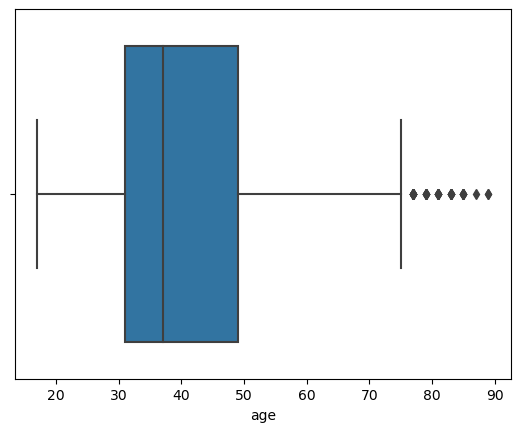

In [84]:
df_2_new = df_2[(df_2["age"])&(df_2["y"] ==1)]
sns.boxplot(data=df_2_new, x="age", hue="y")

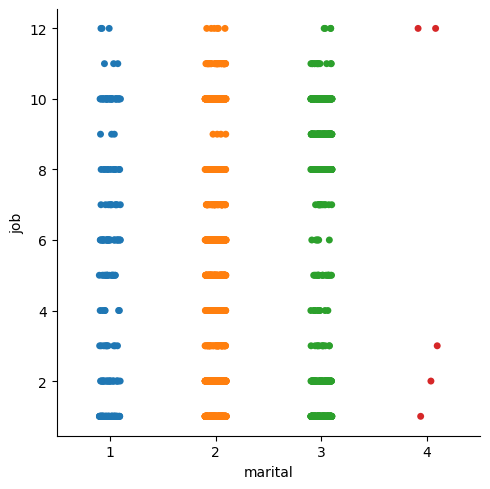

In [85]:
sns.catplot(data=df_2_new, x="marital", y="job")

In [87]:
df_2[(df_2['age']>80) & (df_2['y'] == 'yes')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


<AxesSubplot:xlabel='y', ylabel='count'>

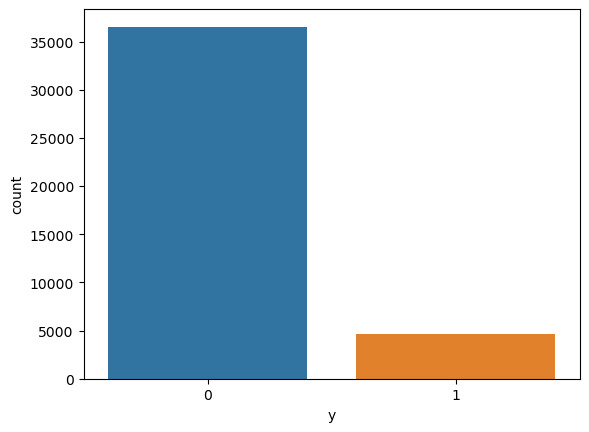

In [28]:
sns.countplot(x="y", data=df_2)

<AxesSubplot:xlabel='y', ylabel='count'>

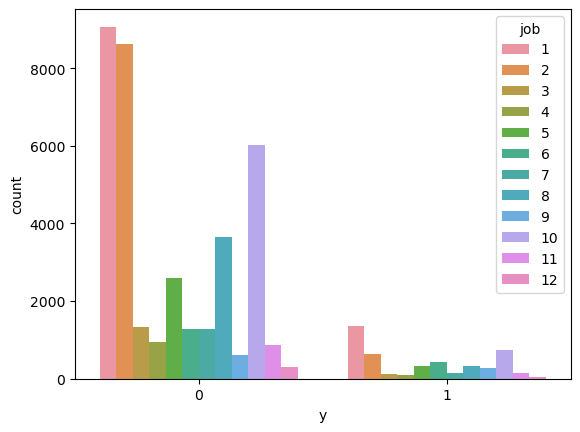

In [29]:
sns.countplot(x="y", hue="job", data=df_2)

<AxesSubplot:xlabel='count', ylabel='education'>

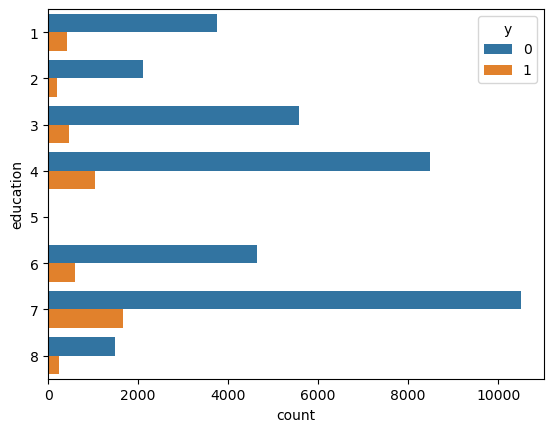

In [30]:
sns.countplot(y="education", hue="y", data=df_2)

<AxesSubplot:xlabel='y', ylabel='count'>

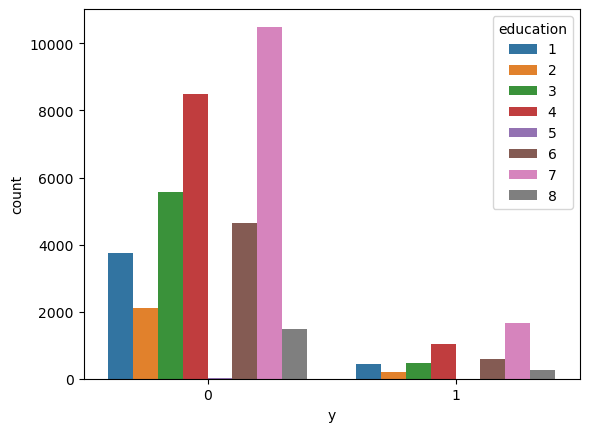

In [31]:
sns.countplot(x="y", hue="education", data=df_2)

<AxesSubplot:xlabel='count', ylabel='education'>

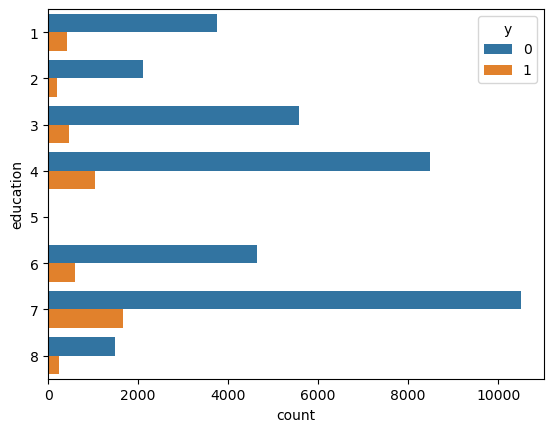

In [32]:
sns.countplot(y="education", hue="y", data=df_2)

In [91]:
loan_subset = df_2[(df_2['default']==1) & (df_2['housing'] == 3)& (df_2['loan'] == 3)]
loan_subset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
18,50,2,2,3,1,3,3,2,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,0
46,57,1,2,7,1,3,3,2,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,0
87,39,1,2,7,1,3,3,2,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,0
124,32,1,2,7,1,3,3,2,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,0
127,31,10,1,6,1,3,3,2,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,24,10,3,7,1,3,3,1,11,2,...,3,6,3,1,-1.1,94.767,-50.8,1.049,4963.6,1
41085,51,1,1,4,1,3,3,1,11,2,...,2,6,4,1,-1.1,94.767,-50.8,1.049,4963.6,1
41098,29,9,3,4,1,3,3,1,11,4,...,1,3,3,3,-1.1,94.767,-50.8,1.05,4963.6,1
41127,61,1,2,4,1,3,3,1,11,3,...,2,999,0,2,-1.1,94.767,-50.8,1.044,4963.6,1


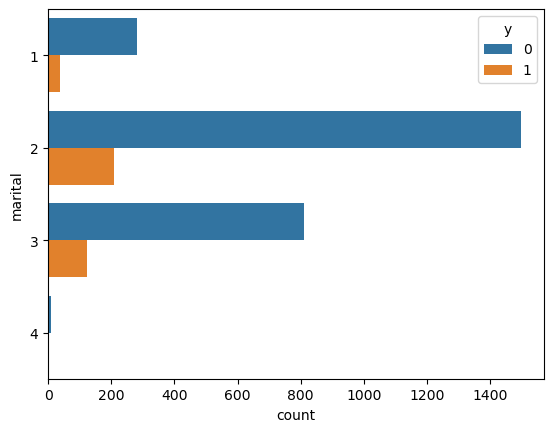

In [92]:
sns.countplot(y="marital", hue="y", data=loan_subset);

In [93]:
df_2[(df_2['default']==1) & (df_2['housing'] == 1)& (df_2['loan'] == 3)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4,56,8,2,4,1,1,3,2,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,0
12,29,2,3,4,1,1,3,2,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,0
25,35,10,2,7,1,1,3,2,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,0
43,57,1,2,7,1,1,3,2,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,0
47,40,2,2,3,1,1,3,2,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41069,51,8,2,4,1,1,3,1,11,1,...,2,3,4,3,-1.1,94.767,-50.8,1.05,4963.6,0
41080,27,9,3,4,1,1,3,1,11,2,...,1,999,0,2,-1.1,94.767,-50.8,1.049,4963.6,0
41090,31,1,3,7,1,1,3,1,11,3,...,2,3,6,3,-1.1,94.767,-50.8,1.048,4963.6,0
41111,46,1,3,7,1,1,3,1,11,2,...,1,999,1,1,-1.1,94.767,-50.8,1.046,4963.6,0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'job'}>,
        <AxesSubplot:title={'center':'marital'}>],
       [<AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'default'}>,
        <AxesSubplot:title={'center':'housing'}>],
       [<AxesSubplot:title={'center':'loan'}>,
        <AxesSubplot:title={'center':'contact'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'day_of_week'}>,
        <AxesSubplot:title={'center':'poutcome'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

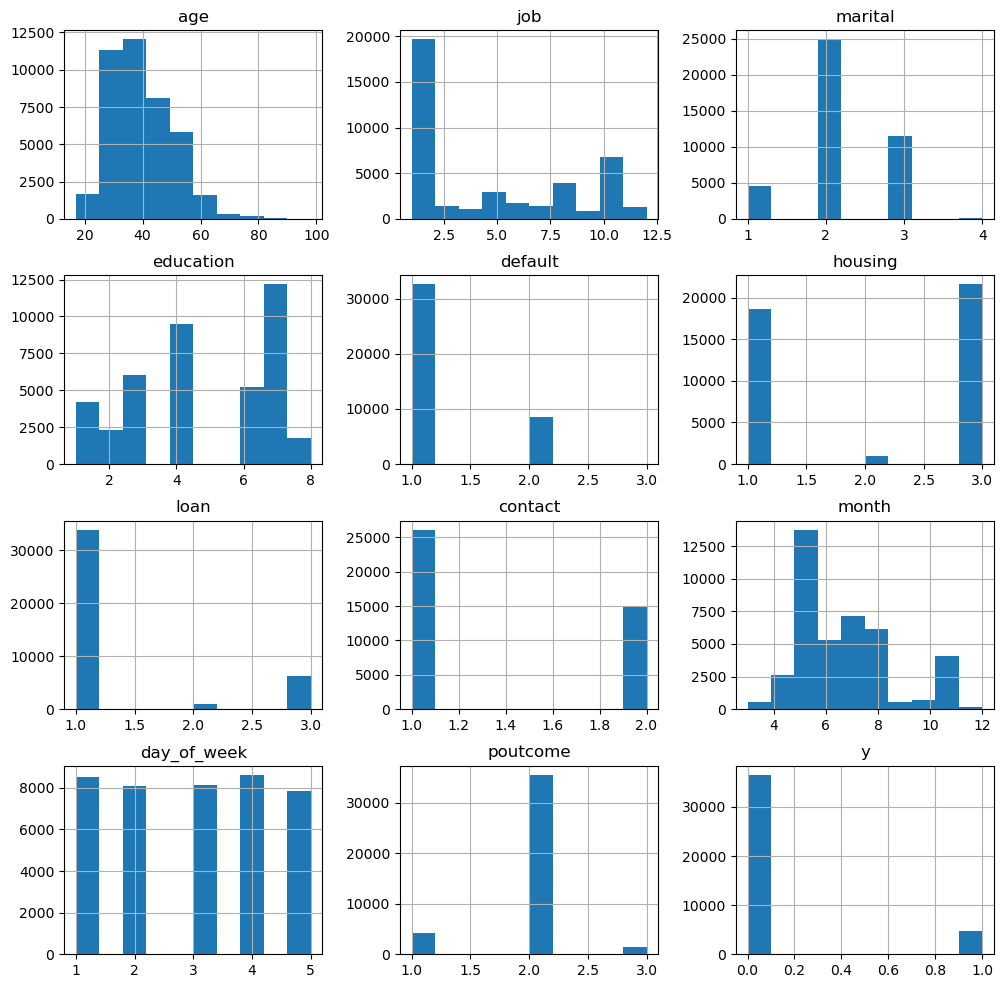

In [94]:
df_2.hist(figsize=(12,12))

In [97]:
df_2_corr = df_2[["age","job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome","y"]].corr()
#
df_2_corr

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
age,1.000000,0.001250,-0.389753,-0.117892,0.164965,-0.001603,-0.007368,0.007021,0.077265,-0.018486,0.019750,0.030399
job,0.001250,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209,-0.025132,0.044859,-0.004961,0.011504,0.025122
marital,-0.389753,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788,-0.054501,-0.018653,0.014472,0.001912,0.046203
education,-0.117892,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384,-0.105726,0.124450,0.005961,0.017009,0.057799
default,0.164965,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782,0.135238,-0.084322,-0.004286,0.023417,-0.099352
housing,-0.001603,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296,-0.082186,0.031865,-0.009003,-0.011783,0.011552
loan,-0.007368,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000,-0.008556,-0.004193,0.002386,-0.001511,-0.004909
contact,0.007021,-0.025132,-0.054501,-0.105726,0.135238,-0.082186,-0.008556,1.000000,-0.324315,0.019583,0.118744,-0.144773
month,0.077265,0.044859,-0.018653,0.124450,-0.084322,0.031865,-0.004193,-0.324315,1.000000,-0.006959,0.028950,0.037187
day_of_week,-0.018486,-0.004961,0.014472,0.005961,-0.004286,-0.009003,0.002386,0.019583,-0.006959,1.000000,-0.012788,0.010051


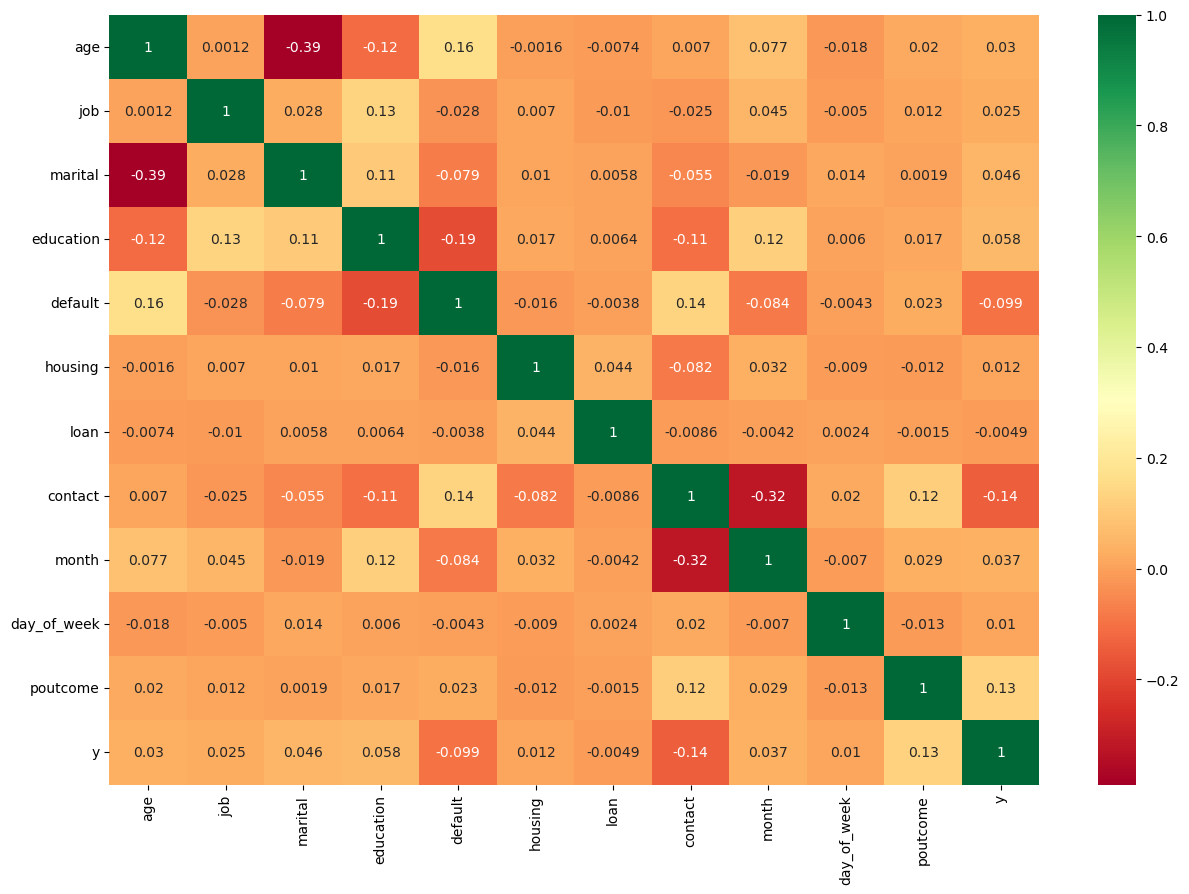

In [98]:
fig= plt.figure(figsize=(15,10));
sns.heatmap(df_2_corr, annot=True, cmap="RdYlGn")
plt.show()

In [101]:
# Correlation between categorical features - Chi2 Test:
# 
from scipy.stats import chi2_contingency
from sklearn import preprocessing
#
def is_correlated(x,y):
    ct=pd.crosstab(index=df_2[x], columns= df_2[y])
    chi_sq_result = chi2_contingency(ct,)
    p,x = chi_sq_result[1], "correlated" if chi_sq_result[1] < 0.05 else "not-correlated"
    return p,x


In [102]:
print("The p-value and correlation for job:", is_correlated('job','y'))
print("The p-value and correlation for marital:", is_correlated('marital','y'))
print("The p-value and correlation for education:", is_correlated('education','y'))
print("The p-value and correlation for default:", is_correlated('default','y'))
print("The p-value and correlation for housing:", is_correlated('housing','y'))
print("The p-value and correlation for loan:", is_correlated('loan','y'))
print("The p-value and correlation for contact:", is_correlated('contact','y'))
print("The p-value and correlation for day_of_week:", is_correlated('day_of_week','y'))
print("The p-value and correlation for poutcome:", is_correlated('poutcome','y'))

The p-value and correlation for job: (4.189763287563623e-199, 'correlated')
The p-value and correlation for marital: (2.068014648442211e-26, 'correlated')
The p-value and correlation for education: (3.3051890144025054e-38, 'correlated')
The p-value and correlation for default: (5.1619579513916376e-89, 'correlated')
The p-value and correlation for housing: (0.05829447669453452, 'not-correlated')
The p-value and correlation for loan: (0.5786752870441754, 'not-correlated')
The p-value and correlation for contact: (1.5259856523129964e-189, 'correlated')
The p-value and correlation for day_of_week: (2.9584820052785297e-05, 'correlated')
The p-value and correlation for poutcome: (0.0, 'correlated')


In [103]:
df_2[(df_2['default']==3) & (df_2['housing'] == 1)& (df_2['loan'] == 1)]
# House and loan is not correlated with the outcome 'y', so we can drop those 2 features

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21580,48,10,2,6,3,1,1,1,8,2,...,1,999,0,2,1.4,93.444,-36.1,4.963,5228.1,0
24866,31,11,2,4,3,1,1,1,11,2,...,2,999,1,1,-0.1,93.2,-42,4.153,5195.8,0


In [104]:
df_2[(df_2['default']==3) & (df_2['housing'] == 3)& (df_2['loan'] == 1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21581,48,10,2,6,3,3,1,1,8,2,...,1,999,0,2,1.4,93.444,-36.1,4.963,5228.1,0


In [105]:
x=df_2.drop('y',axis=1)
y=df_2['y']

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model1=SVC(kernel ='linear')

# training set in x, y axis
result1=model1.fit(x_train,y_train)
y_pred1=result1.predict(x_test)

In [107]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.svm import SVC
print("For test size:0.2, Accuracy Of SVM: ", accuracy_score(y_pred1,y_test))
print(classification_report(y_pred1,y_test))

For test size:0.2, Accuracy Of SVM:  0.896091284292304
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7290
           1       0.55      0.54      0.54       948

    accuracy                           0.90      8238
   macro avg       0.74      0.74      0.74      8238
weighted avg       0.90      0.90      0.90      8238



In [108]:
# SVM using Polynomial kernal with degree of polynomial = 2

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
model7 = SVC(kernel ='poly', degree = 2)

# training set in x, y axis
result7 = model7.fit(x_train, y_train)
y_pred7=result7.predict(x_test)

In [109]:
print("For test size:0.25, Accuracy Of SVM sigmoid kernal: ", accuracy_score(y_pred7,y_test))
print(classification_report(y_pred7,y_test))

For test size:0.25, Accuracy Of SVM sigmoid kernal:  0.8937554627561426
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      9920
           1       0.20      0.63      0.30       377

    accuracy                           0.89     10297
   macro avg       0.59      0.77      0.62     10297
weighted avg       0.96      0.89      0.92     10297



Conclusion:

This dataset have more categorical values to address, and the model is design with SVM. 
It is best suitable for categorical features and given high accuracy. From the above analysis, 
we can see 90% accuracy from our model, Default credit, housing loan, 
contact type is not having bigger impact in the output in this dataset 
but this is also a factor which affect the customer to not to take term loan, 
and we take the effort of the campaign department, 
which have some considerable amount of impact in the result,
last call duration indicates that which ever call spoke lesser time in seconds customer do not take term deposit,
and long gap provided between the followup or call, there is bigger impact in the closing of the product, 
there is high chance of customer take term deposit with some other bank or from different team.
Followup with customer is very important for the campaign to increase the term loan taking output. 
Concentrating more on the not converted people from the age group between 30 to 60 and salary profession gives improve more outcome for the term deposit. 
There is one more value in many of features not addressed is "unknown" values (job, marital, education, default, housing, loan), 
which can be handled by different methods like interpolate or replace from pandas. 
That can be the future scope of the project which may increase the accuracy further more.